In [127]:
#import library yang dipakai
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Objective Analysis

Tujuan dari analisis yang akan dilakukan terdiri sebagai berikut:
- Penjualan total tiap bulan dan tiap tahunnya
- Tipe pembayaran yang sering digunakan dan rata-rata nominalnya
- Penjualan total untuk setiap state/provinsi
- Penjualan total untuk setiap kategori
- Kategori produk dengan rata-rata review terburuk

# Membaca file DB

In [128]:
# membuat jalur file
dbfile = 'C:/Users/andik/OneDrive/Documents/Data Analytics Pacmann/03 - SQL & Data Wrangling/olist.db'
# membuat koneksi sql ke database
con = sqlite3.connect(dbfile)

# membuat cursor
cur = con.cursor()

# membaca seluruh nama tabel
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

# print nama tabel
print(table_list)


[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


Pada file olist.db, terdapat 9 tabel yang dapat dipakai, antara lain:
- data customer (olist_order_customer_dataset)
- data order (olist_order_dataset)
- data order review (olist_order_reviews_dataset)
- data order payments (olist_order_payments_dataset)
- data order items (olist_order_items_dataset)
- data products (olist_products_dataset)
- sellers (olist_sellers_dataset)
- data geolocation (olist_geolocation_dataset) 
- data translasi kategori produk (product_category_name_translation)

Tabel-tabel tersebut, akan dimasukkan ke masing-masing dataframe untuk mempermudah pengerjaannya, dengan data datetime langsung dilakukan parse_dates.

# Memindahkan seluruh tabel ke masing-masing dataframe

In [129]:
#memindahkan seluruh tabel ke masing-masing dataframe
customer = pd.read_sql_query("SELECT * FROM olist_order_customer_dataset", con)
customer.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [130]:
order = pd.read_sql_query("SELECT * FROM olist_order_dataset", con, parse_dates=['order_purchase_timestamp',
                                                                                'order_approved_at',
                                                                                'order_delivered_carrier_date',
                                                                                'order_delivered_customer_date',
                                                                                'order_estimated_delivery_date'])
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [131]:
order_review = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", con, parse_dates=['review_creation_date',
                                                                                'review_answer_timestamp'])
order_review.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [132]:
order_payment = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", con)
order_payment.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [133]:
order_item = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", con, parse_dates='shipping_limit_date')
order_item.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [134]:
product = pd.read_sql_query("SELECT * FROM olist_products_dataset", con)
product.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [135]:
seller = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", con)
seller.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [136]:
geolocation = pd.read_sql_query("SELECT * FROM olist_geolocation_dataset", con)
geolocation.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [137]:
trans_kat_produk = pd.read_sql_query("SELECT * FROM product_category_name_translation", con)
trans_kat_produk.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


## Tabel yang akan dipakai

Berdasarkan objektif yang dibuat di atas, maka data-data yang akan digunakan antara lain:

- tabel customer: customer_id & customer_state
- order: order_id, customer_id, order_status, order_purchase_timestamp
- order_review : order_id, review_score
- order_payment: order_id, payment_type, payment_value
- order_items: order_id, product_id, price
- products: product_id, product_category_name
- trans_kat_produk: product_category_name, product_category_name_english

## Mendapatkan nama inggris dari kategori produk

Dataset yang digunakan adalah dataset olist, yang merupakan perusahaan ecommerce di brasil, sehingga nama kategori produk pada tabel product masih menggunakan bahasa portugis. Maka dari itu, pada step ini akan diambil nama inggris untuk masing-masing product_id pada tabel produk. 

In [138]:
product_cat = product[["product_id", "product_category_name"]].merge(trans_kat_produk.iloc[:,1:3], how="left", on = "product_category_name")
product_cat.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


## Data Wrangling

Yang akan menjadi tabel utama adalah tabel order, karena tabel ini yang memiliki informasi penjualan dari suatu produk. 

In [139]:
tabel1 = order.iloc[:,[1,2,3,4]].merge(order_item[["order_id", "product_id", "price"]], how="left", on = "order_id")
tabel2 = tabel1.merge(order_payment.iloc[:,[1,3,5]], how="left", on = "order_id")
tabel3 = tabel2.merge(order_review.iloc[:,[1,2,3]], how="left", on = "order_id")
tabel4 = tabel3.merge(customer.iloc[:,[1,5]], how="left", on = "customer_id")
tabel5 = tabel4.merge(product_cat.iloc[:,[0,2]], how="left", on = "product_id")
tabel5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,payment_type,payment_value,review_id,review_score,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,boleto,141.46,8d5266042046a06655c8db133d120ba5,4.0,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,credit_card,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,GO,auto


In [140]:
tabel5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   product_id                     118310 non-null  object        
 5   price                          118310 non-null  float64       
 6   payment_type                   119140 non-null  object        
 7   payment_value                  119140 non-null  float64       
 8   review_id                      118146 non-null  object        
 9   review_score                   118146 non-null  float64       
 10  customer_state                 119143 non-null  object        
 11  

## Data Cleaning

### Data Missing

In [141]:
tabel5.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
product_id                        833
price                             833
payment_type                        3
payment_value                       3
review_id                         997
review_score                      997
customer_state                      0
product_category_name_english    2567
dtype: int64

Terdapat nilai null pada beberapa kolom. Beberapa kolom tersebut akan dilakukan perlakuan sebagai berikut:
- product_id : mengubah null menjadi "unknown"
- price : akan dicocokkan dengan nilai pada payment_value
- payment type : diisi dengan nilai modus (yaitu tipe pembayaran yang sering digunakan)
- payment_value : diisi dengan nilai price
- review_id : mengubah null menjadi "unknown"
- review_score : diisi dengan nilai yang sering muncul (modus)
- product_category_name_english : diisi dengan "unknown"

In [142]:
#memproses missing data yang diubah menggunakan unknown
tabel5.loc[tabel5.product_id.isna(),"product_id"] = "unknown"
tabel5.loc[tabel5.review_id.isna(),"review_id"] = "unknown"
tabel5.loc[tabel5.product_category_name_english.isna(),"product_category_name_english"] = "unknown"
tabel5.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
product_id                         0
price                            833
payment_type                       3
payment_value                      3
review_id                          0
review_score                     997
customer_state                     0
product_category_name_english      0
dtype: int64

In [143]:
#mencari nilai modus untuk mengisi nilai payment_type & review_score
mode_payment_type = tabel5.payment_type.value_counts().idxmax()
mode_review_score = tabel5.review_score.value_counts().idxmax()

#mengganti nilai null menjadi modus
tabel5.loc[tabel5.payment_type.isna(),"payment_type"] = mode_payment_type
tabel5.loc[tabel5.review_score.isna(),"review_score"] = mode_review_score
tabel5.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
product_id                         0
price                            833
payment_type                       0
payment_value                      3
review_id                          0
review_score                       0
customer_state                     0
product_category_name_english      0
dtype: int64

In [144]:
#mengganti nilai price -> payment_value & payment_value -> price
tabel5.loc[tabel5.payment_value.isna(),"payment_value"] = tabel5.loc[tabel5.payment_value.isna(),"price"]
tabel5.loc[tabel5.price.isna(),"price"] = tabel5.loc[tabel5.price.isna(),"payment_value"]
tabel5.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
product_id                       0
price                            0
payment_type                     0
payment_value                    0
review_id                        0
review_score                     0
customer_state                   0
product_category_name_english    0
dtype: int64

### Memeriksa Inkonsistensi Format

Pada pemeriksaan ini, kita akan mencoba melihat kolom bertipe object, yang hanya memiliki beberapa unique value.

In [145]:
tabel5.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [146]:
tabel5.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined'],
      dtype=object)

In [147]:
tabel5.review_score.unique()

array([4., 5., 2., 1., 3.])

In [148]:
tabel5.customer_state.unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

Pada analisa di atas, didapatkan bahwa data-data pada kolom object tidak memiliki nilai yang inkonsisten, maka data cleaning akan berlanjut pada step selanjutnya.

### Memeriksa Outlier

In [149]:
tabel5.describe().T

,count,mean,std,min,25%,50%,75%,max
price,119143.0,121.169696,185.874505,0.0,39.90,74.99,134.90,6735.00
payment_value,119143.0,172.731919,267.773473,0.0,60.85,108.15,189.24,13664.08
review_score,119143.0,4.023820,1.397444,1.0,4.00,5.00,5.00,5.00


Pada data payment_value terdapat nilai maksimum hingga mencapai 13,664 sedangkan nilai Q3 = 189.24. Harus diperiksa mengenai kategori produk apa yang memiliki nilai di atas dari batas outlier.

In [150]:
#menghitung IQR
q1=tabel5.payment_value.quantile(0.25)
q3=tabel5.payment_value.quantile(0.75)
IQR=q3-q1

#filter data > batas outlier
outliers = tabel5[tabel5.payment_value > (q3+1.5*IQR)]
outliers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,payment_type,payment_value,review_id,review_score,customer_state,product_category_name_english
20,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,638bbb2a5e4f360b71f332ddfebfd672,1299.0,credit_card,1376.45,unknown,5.0,RJ,construction_tools_construction
45,434d158e96bdd6972ad6e6d73ddcfd22,2a1dfb647f32f4390e7b857c67458536,delivered,2018-06-01 12:23:13,c7df652246ed7b3300aaf46960c141e4,445.0,boleto,508.17,b3b4ba30f4ff674b60b53cbb408ad037,5.0,PE,health_beauty
61,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,60184212dae4e6b0da32bf54271a8c4a,369.0,credit_card,386.33,ffa0d9ba2678dba5fa370295245f473d,4.0,RJ,watches_gifts
75,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,delivered,2018-01-07 21:44:54,d457916b4fdc60154ed93b5dd3e6fd69,329.9,credit_card,824.76,c52b2e7eca1856a268a36a9df72a6150,3.0,BA,construction_tools_construction
76,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,delivered,2018-01-07 21:44:54,d457916b4fdc60154ed93b5dd3e6fd69,329.9,credit_card,824.76,c52b2e7eca1856a268a36a9df72a6150,3.0,BA,construction_tools_construction


<AxesSubplot:xlabel='payment_value', ylabel='product_category_name_english'>

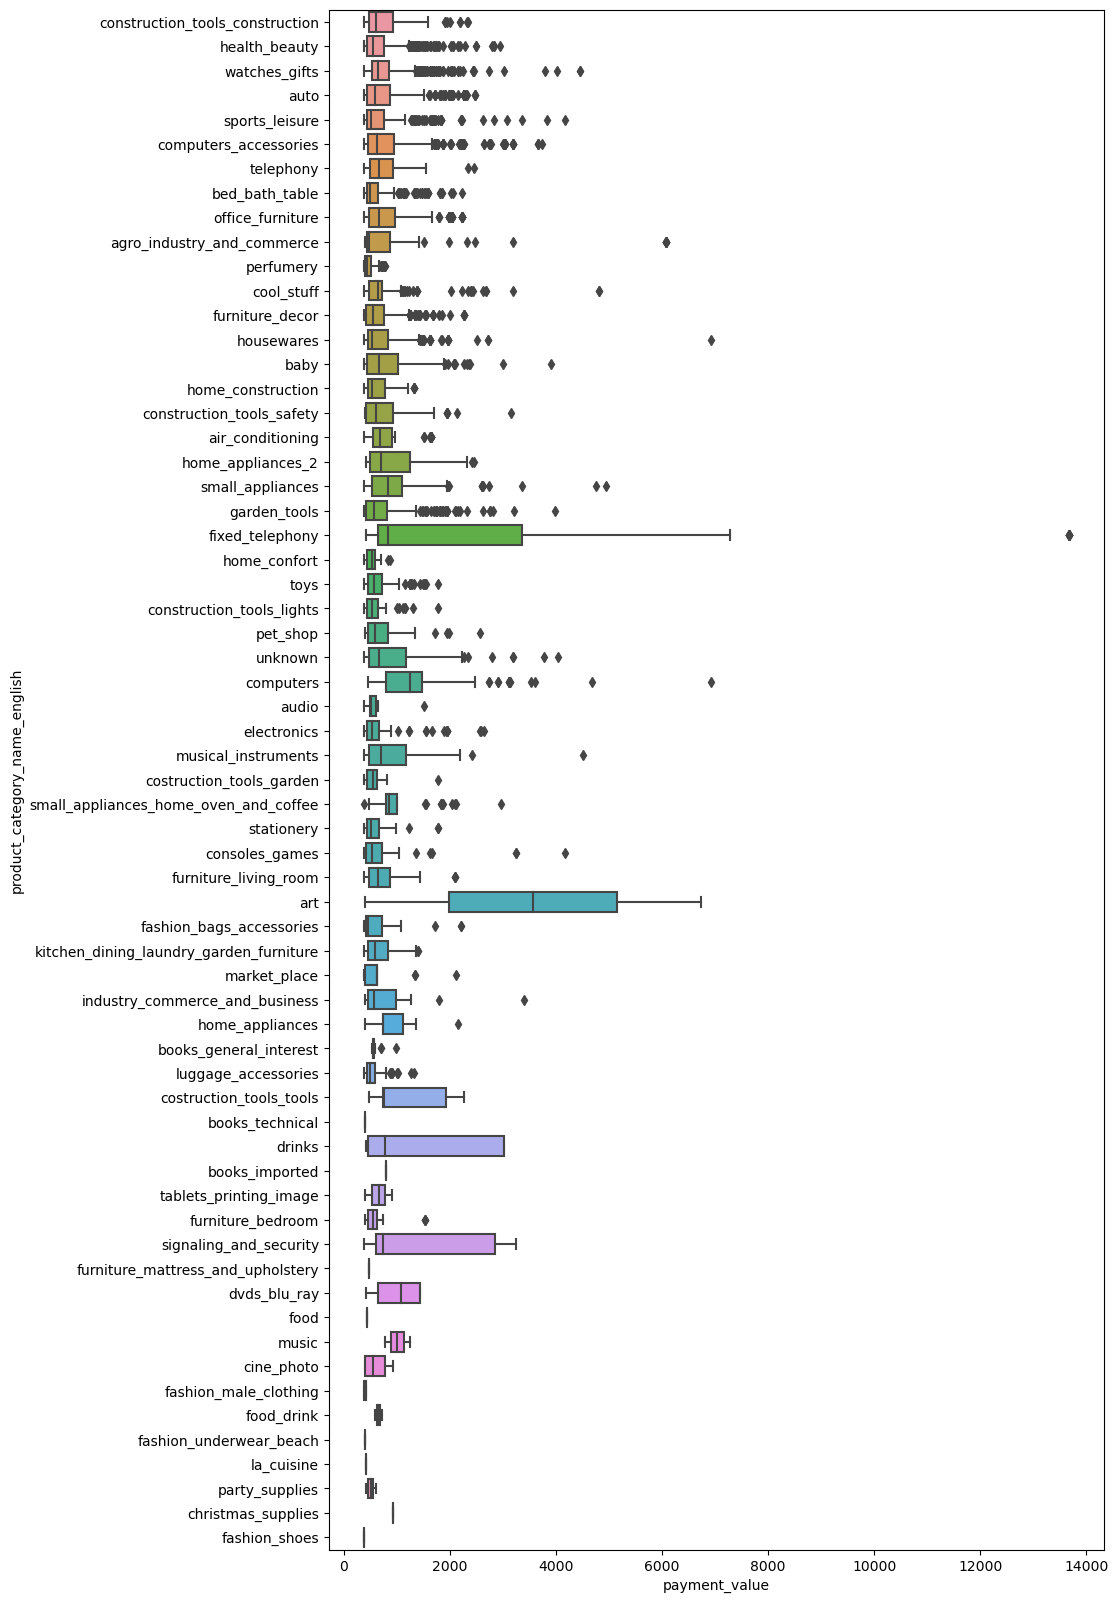

In [151]:
#plot sebaran data tiap kategori pada outlier
fig = plt.figure(figsize=(10, 20))
sns.boxplot(data=outliers, x="payment_value", y="product_category_name_english")

Grafik di atas adalah kategori produk yang memiliki nilai payment lebih dari batas outlier. Namun, dapat anda lihat, bahwa beberapa produk memang memiliki harga yang jauh tinggi dibandingkan barang lainnya, seperti computers, fixed_telephony, art, houseware, agro_industry, signaling_security, dan lain-lain. Karena variasi produk yang banyak, maka nilai-nilai payment yang berbeda jauh ini tidak dapat dianggap sebagai outlier yang harus dibuang dari suatu data.

### Handling Duplikasi

In [152]:
tabel5[tabel5.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,payment_type,payment_value,review_id,review_score,customer_state,product_category_name_english
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,08574b074924071f4e201e151b152b4e,99.00,credit_card,259.06,15898b543726a832d4137fbef5d1d00e,1.0,RJ,garden_tools
60,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,f48eb5c2fde13ca63664f0bb05f55346,60.00,credit_card,151.04,25b502beeef8b3aff87449ccdc001f53,1.0,RS,sports_leisure
66,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,b37b72d5a56f887725c2862184b8cab8,22.99,credit_card,91.68,4ff7c437ae60fa0b3c700ade55155027,1.0,SE,telephony
76,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,delivered,2018-01-07 21:44:54,d457916b4fdc60154ed93b5dd3e6fd69,329.90,credit_card,824.76,c52b2e7eca1856a268a36a9df72a6150,3.0,BA,construction_tools_construction
79,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,delivered,2018-06-18 16:02:23,a659cb33082b851fb87a33af8f0fff29,84.90,credit_card,392.60,0047ca502c37fbba9b3a31eeae3fe0c2,5.0,SP,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
119062,dbd4cbb492a12b99c5224014930acc18,a14f464b2a19d761f7f3f0885d5ea955,delivered,2017-03-26 14:12:46,d34efb58e1930773fcde9b951892b1b1,37.40,debit_card,140.90,08030e04097175f440c28cc4b2066501,4.0,SP,housewares
119084,83db27f85506380229913b0dfdf5cd18,472acc24324ad4cee482fe4ef5910dc1,delivered,2018-04-18 12:35:58,86f2416d4670e4ea3ca5494d043d9f24,149.94,boleto,398.18,ef37683824c0cc139f50f7b2d562923c,5.0,RJ,office_furniture
119092,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,4f18ca9862f511ecba98258b2194d061,95.00,credit_card,239.50,103d39074fa26b7bfd65101962bbec58,2.0,SP,furniture_bedroom
119111,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,0df37da38a30a713453b03053d60d3f7,356.00,credit_card,748.24,f5453b3d33358ed459eb4312392b96a8,4.0,SP,sports_leisure


Terdapat 11304 baris yang merupakan data duplikat, maka data ini harus dihapus.

In [153]:
clean_data = tabel5.drop_duplicates(keep='first')
clean_data

,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,payment_type,payment_value,review_id,review_score,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,boleto,141.46,8d5266042046a06655c8db133d120ba5,4.0,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,credit_card,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,ac35486adb7b02598c182c2ff2e05254,72.00,credit_card,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,SP,health_beauty
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,credit_card,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,SP,baby
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,205.99,credit_card,271.01,371579771219f6db2d830d50805977bb,5.0,BA,home_appliances_2
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,credit_card,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,RJ,computers_accessories


# Analisa Objektif

Untuk data penjualan, harus dianalisa terlebih dahulu mengenai order status.

In [154]:
tabel5.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Penjelasan order status (asumsi):
- delivered : sudah diterima oleh pelanggan
- invoiced  : sudah bayar dan approved, tapi belum di proses
- shipped   : sedang dalam perjalanan
- processing: sedang di proses seller
- unavailable: barang tidak tersedia
- canceled: pembelian dibatalkan
- created: baru dibuat dan belum di approved
- approved: pembelian sudah disetujui

dari penjelasan tersebut, agar mendapatkan nilai hasil penjualan, maka order status canceled dan unavailable akan dikeluarkan

In [155]:
#mengeluarkan data status order yang canceled dan unavailable
clean_data = clean_data[~clean_data.order_status.isin(["canceled", "unavailable"])]
clean_data.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'created',
       'approved'], dtype=object)

## Objektif 1: Penjualan total tiap bulan dan tiap tahunnya

Untuk mendapatkan data bulan dan tahun, dapat menggunakan fungsi strftime, yang akan diproses menggunakan kolom order_purchase_timestamp.

In [156]:
#mendapatkan data year month
clean_data['year_month'] = [x.strftime('%Y%m') for x in clean_data.order_purchase_timestamp]
clean_data.head()

C:\Users\andik\AppData\Local\Temp\ipykernel_5168\1079548887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['year_month'] = [x.strftime('%Y%m') for x in clean_data.order_purchase_timestamp]


,order_id,customer_id,order_status,order_purchase_timestamp,product_id,price,payment_type,payment_value,review_id,review_score,customer_state,product_category_name_english,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,SP,housewares,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,boleto,141.46,8d5266042046a06655c8db133d120ba5,4.0,BA,perfumery,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,credit_card,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,GO,auto,201808


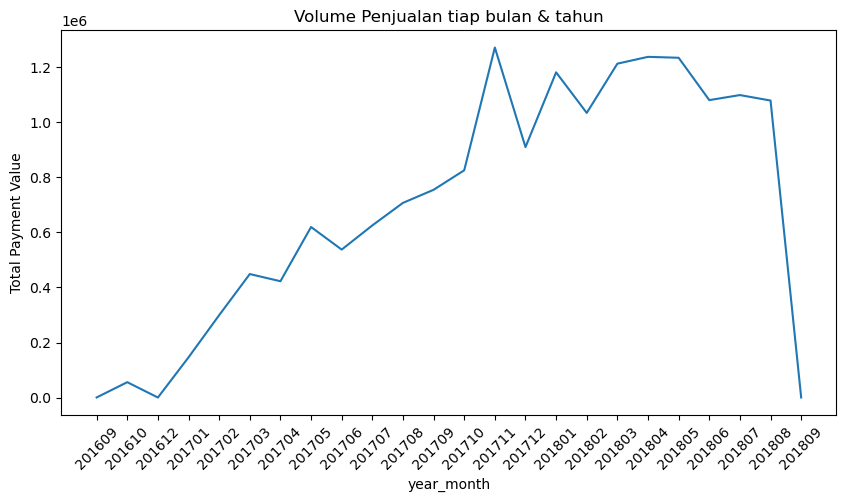

In [173]:
#group by year_month nilai penjumlahan payment value
date_payment = clean_data[['year_month', 'payment_value']].groupby("year_month").sum().reset_index()

#mengurutkan data dari data terlama
date_payment.sort_index(ascending=True)

#line plot yearmonth vs total payment_value
fig = plt.figure(figsize=(10, 5))
sns.lineplot(data=date_payment, x="year_month", y="payment_value")
plt.xticks(rotation=45)
plt.ylabel("Total Payment Value")
plt.title("Volume Penjualan tiap bulan & tahun")
plt.show()

In [158]:
#cek tanggal penjualan terakhir
max(clean_data.order_purchase_timestamp)

Timestamp('2018-09-03 09:06:57')

Penurunan pada Sep 2018 terjadi karena data yang digunakan memiliki tanggal maksimal pada tanggal 3 Sep 2018, sehingga belum cukup data untuk merangkum seluruh penjualan pada bulan tersebut. 

Dapat dilihat bahwa volume penjualan terus bertambah, tiap bulannya. Dengan beberapa spike pada bulan Mar'17, Mei'17, Nov'17, dan Jan'18. Lalu mengalami penurunan pada bulan Des'17, Feb'18, dan Jun'18.

## Objektif 2: Tipe pembayaran yang sering digunakan dan rata-rata nominalnya

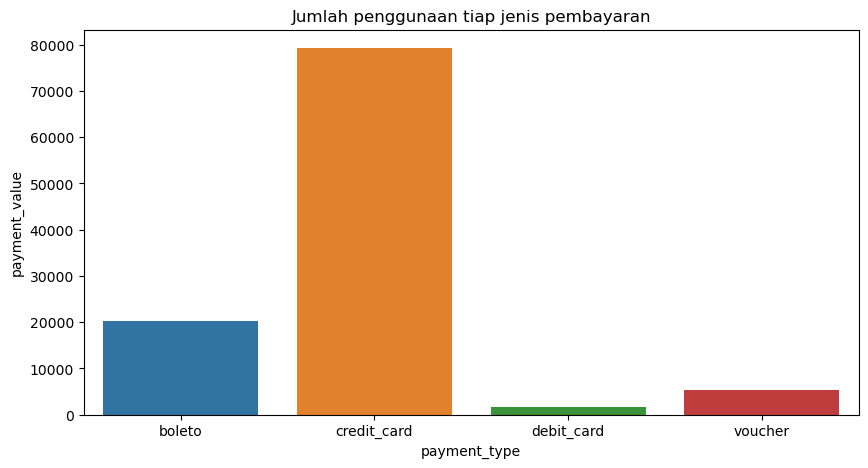

In [174]:
#menghitung jumlah penggunaan tiap jenis pembayaran
payment_type_count = clean_data[['payment_type', 'payment_value']].groupby("payment_type").count()
payment_type_count = payment_type_count.reset_index()

#plot barplot untuk masing-masing tipe payment
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=payment_type_count, x="payment_type", y="payment_value")
plt.title("Jumlah penggunaan tiap jenis pembayaran")
plt.show()

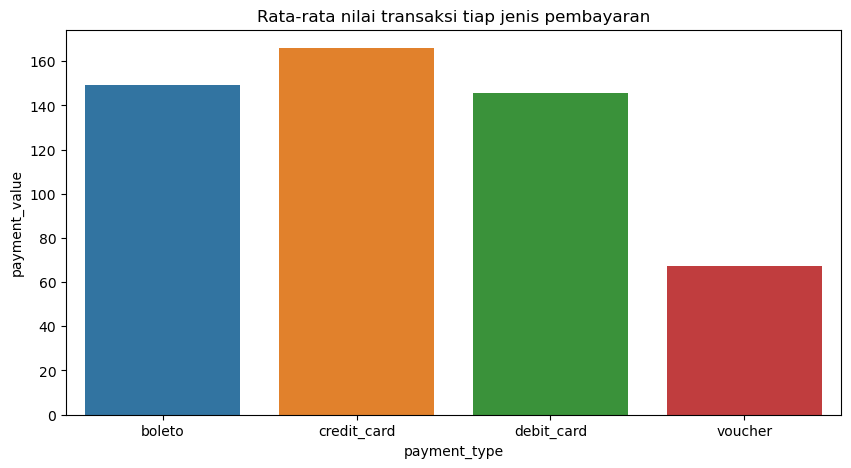

In [175]:
#menghitung rata-rata pembayaran tiap jenis pembayaran
payment_type_mean = clean_data[['payment_type', 'payment_value']].groupby("payment_type").mean()
payment_type_mean = payment_type_mean.reset_index()

#plot barplot untuk masing-masing tipe payment
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=payment_type_mean, x="payment_type", y="payment_value")
plt.title("Rata-rata nilai transaksi tiap jenis pembayaran")
plt.show()

<AxesSubplot:xlabel='payment_value', ylabel='payment_type'>

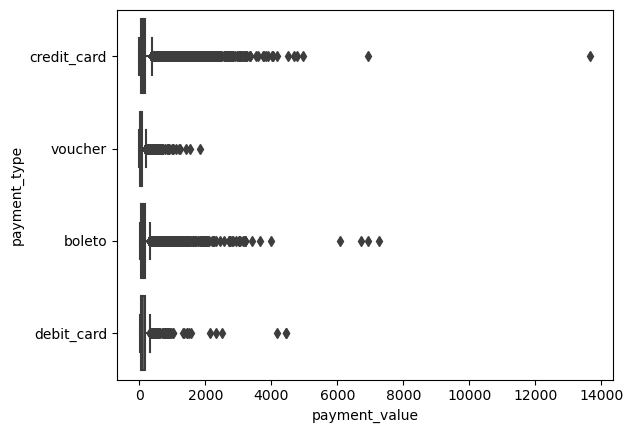

In [161]:
sns.boxplot(data=clean_data, x="payment_value", y="payment_type")

Tipe pembayaran yang sering digunakan adalh credit card. Diikuti dengan boleto yang merupakan metode pembayaran yang akan menggenerate barcode boleto, yang bisa dibayar melalui bank, kantor pos, minimarket, dan lain-lain. Lalu pembayaran menggunakan voucher, dan terakhir menggunakan debit card.

Transaksi yang berjumlah besar, sering menggunakan credit card & boleto.

## Objektif 3: Penjualan total untuk setiap state/provinsi

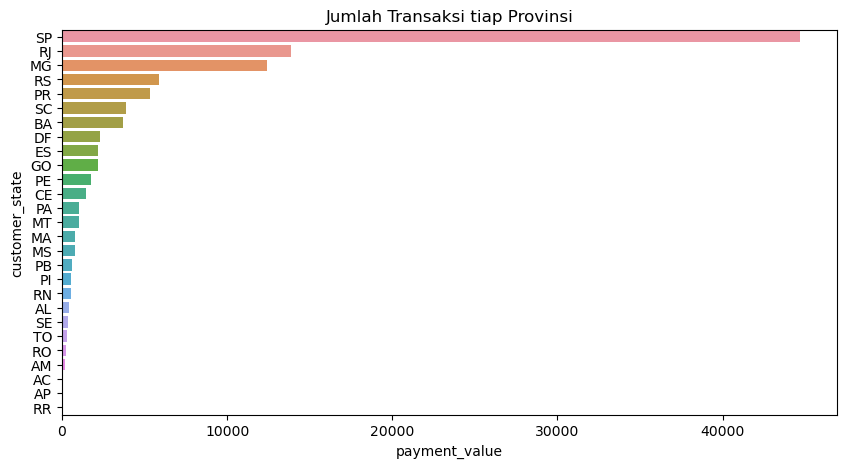

In [176]:
#menghitung jumlah penjualan setiap provinsi
state_sale_count = clean_data[['customer_state', 'payment_value']].groupby("customer_state").count()
state_sale_count = state_sale_count.reset_index()

#barplot data jumlah transaksi
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=state_sale_count, y="customer_state", x="payment_value", order=state_sale_count.sort_values('payment_value', ascending=False).customer_state)
plt.title("Jumlah Transaksi tiap Provinsi")
plt.show()

In [163]:
#5 Provinsi dengan jumlah transaksi terbesar
state_sale_count.sort_values('payment_value', ascending=False)[:5]

,customer_state,payment_value
25,SP,44696
18,RJ,13888
10,MG,12440
22,RS,5866
17,PR,5342


3 Provinsi yang memberikan jumlah transaksi terbanyak adalah SP (Sao Paolo), diikuti RJ (Rio De Janiero), & MG (Minas Gerais).

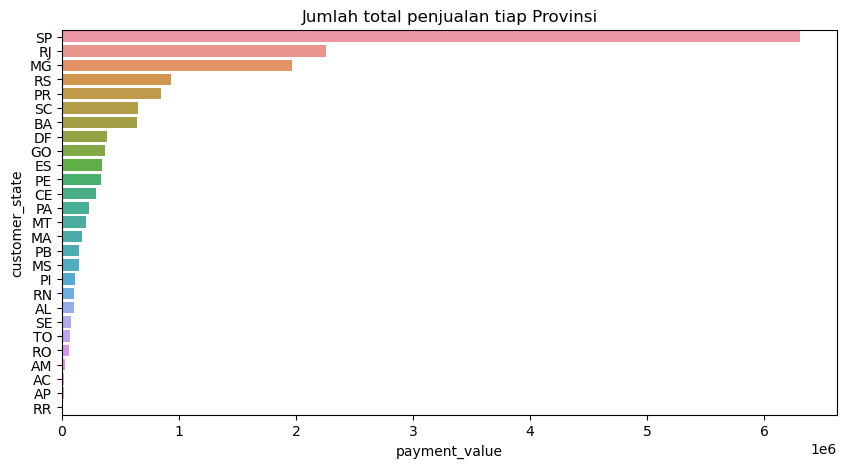

In [177]:
#menghitung jumlah total penjualan setiap provinsi
state_sale_sum = clean_data[['customer_state', 'payment_value']].groupby("customer_state").sum()
state_sale_sum = state_sale_sum.reset_index()

#barplot total penjualan tiap provinsi
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=state_sale_sum, y="customer_state", x="payment_value", order=state_sale_sum.sort_values('payment_value', ascending=False).customer_state)
plt.title("Jumlah total penjualan tiap Provinsi")
plt.show()

In [165]:
#5 Provinsi dengan jumlah penjualan terbesar
state_sale_sum.sort_values('payment_value', ascending=False)[:5]

,customer_state,payment_value
25,SP,6305690.22
18,RJ,2251986.95
10,MG,1960948.95
22,RS,933649.60
17,PR,845422.43


3 Provinsi yang memberikan jumlah penjualan terbesar adalah SP (Sao Paolo), diikuti RJ (Rio De Janiero), & MG (Minas Gerais).

## Objektif 4: Penjualan total untuk 10 kategori Terbaik

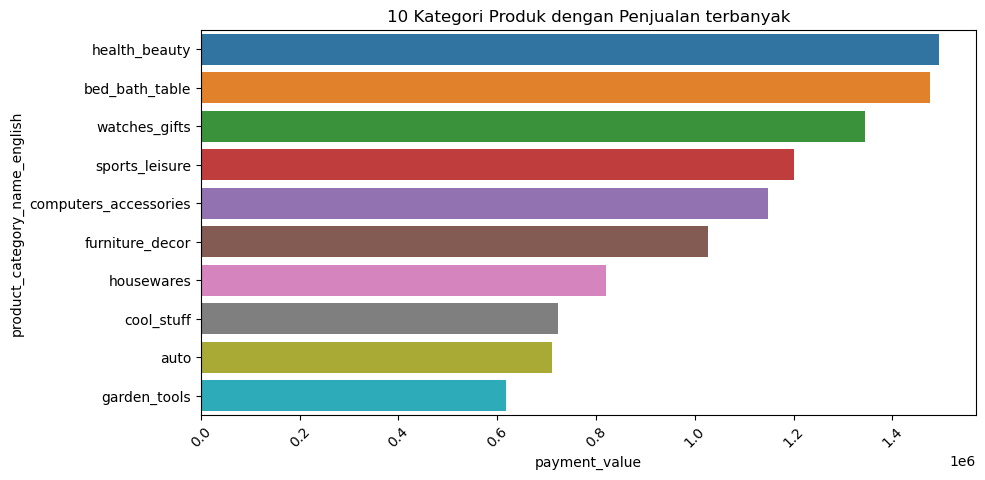

In [166]:
#menghitung jumlah total penjualan setiap kategori
cat_sale = clean_data[['product_category_name_english', 'payment_value']].groupby("product_category_name_english").sum()
cat_sale = cat_sale.reset_index()

#mengambil 10 data dengan nilai total penjualan terbesar
cat_sale = cat_sale.sort_values('payment_value', ascending=False)[:10]

#plot 10 data kategori dengan penjualan terbesar
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=cat_sale , y="product_category_name_english", x="payment_value", order=cat_sale .sort_values('payment_value', ascending=False).product_category_name_english)
plt.xticks(rotation=45)
plt.title("10 Kategori Produk dengan Penjualan terbanyak")
plt.show()

In [167]:
#5 kategori produk dengan sales terbesar
cat_sale.sort_values('payment_value', ascending=False)[:5]

,product_category_name_english,payment_value
43,health_beauty,1494668.07
7,bed_bath_table,1476224.30
71,watches_gifts,1344352.95
65,sports_leisure,1200514.12
15,computers_accessories,1148707.03


Pada grafik tersebut, dapat dilihat bahwa 5 kategori produk yang sering dibeli oleh customer adalah health_beauty, diikuti bed_bath_table, watches_gifts, sport_leisure, dan computer_accessories. 

## Objektif 5: Kategori produk dengan rata-rata review terburuk

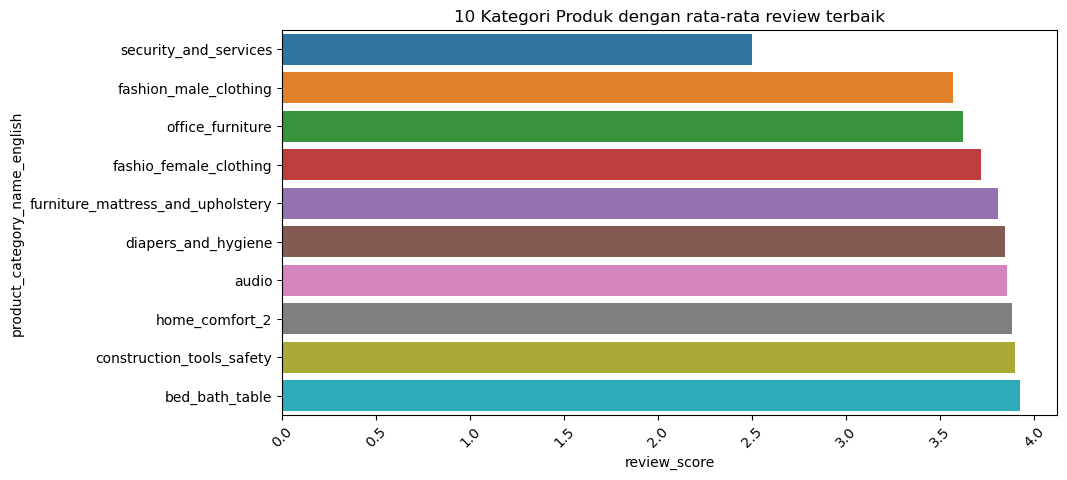

In [168]:
#menghitung rata-rata score review untuk tiap kategori produk
review_mean = clean_data[['product_category_name_english', 'review_score']].groupby("product_category_name_english").mean()
review_mean = review_mean.reset_index()

#mengambil 10 data dengan skor review terburuk
review_mean = review_mean.sort_values('review_score', ascending=True)[:10]

#plot data tersebut
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=review_mean , y="product_category_name_english", x="review_score", order=review_mean.sort_values('review_score').product_category_name_english)
plt.title("10 Kategori Produk dengan rata-rata review terbaik")
plt.show()

In [169]:
review_mean.sort_values('review_score')[:5]

,product_category_name_english,review_score
61,security_and_services,2.500000
30,fashion_male_clothing,3.568182
57,office_furniture,3.618943
27,fashio_female_clothing,3.714286
41,furniture_mattress_and_upholstery,3.804878


Kategori produk dengan review terburuk pertama adalah security_and_services dengan rata-rata skor 2.5, diikuti dengan fashion male & female pada skor 3.57 dan 3.71. Lalu ada office_furniture dengan skor 3.62.